In [4]:
from h5py import File as H5File
from PIL import Image
from keras.layers import Input
from keras.models import Model, Sequential
import matplotlib.pylab as plt
import numpy as np
from skimage.exposure import equalize_hist

import blusky.datasets as datasets
from blusky.transforms.cascade2d import Cascade2D
from blusky.wavelets.i_wavelet_2d import IWavelet2D
from blusky.wavelets.morlet2d import Morlet2D

In [5]:
wav1 = Morlet2D(sample_rate=0.004, 
               center_frequency=90., 
               bandwidth=(50.,25.), 
               crop=3.5,
               taper=False)

wav2 = Morlet2D(sample_rate=0.004, 
               center_frequency=45., 
               bandwidth=(40.,20), 
               crop=3.5,
               taper=False)

wav3 = Morlet2D(sample_rate=0.004, 
               center_frequency=22.5, 
               bandwidth=(20,10.), 
               crop=3.5,
               taper=False)

inp = Input(shape=(99,99,1))
cascade = Cascade2D("none", 0, angles=(0.0, 45., 90.), wavelets=[wav1, wav2, wav3])

# create the transform
result = cascade.transform(inp)

model = Model(inputs=inp, outputs=result)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 99, 99, 1)    0                                            
__________________________________________________________________________________________________
depthwise_conv2d_19 (DepthwiseC (None, 87, 87, 3)    510         input_2[0][0]                    
__________________________________________________________________________________________________
depthwise_conv2d_20 (DepthwiseC (None, 87, 87, 3)    510         input_2[0][0]                    
__________________________________________________________________________________________________
depthwise_conv2d_21 (DepthwiseC (None, 83, 83, 3)    870         input_2[0][0]                    
__________________________________________________________________________________________________
depthwise_

In [6]:
from os import path

imgs = []
for label in ['chaotic', 'fault', 'salt', 'horizon']:
    for im in range(0,3):
        data = path.join(
            path.join(path.dirname(datasets.__file__), "test_tiles"), "{}{}.png".format(label, im)
        )
        data = np.array(Image.open(data)).astype(np.float32)
        data /= np.max(data)
        
        imgs.append(data)
imgs = np.array(imgs)
imgs.shape = list(imgs.shape) + [1]

In [7]:
result = model.predict(imgs)

W0715 21:47:43.316866 4321104768 deprecation_wrapper.py:119] From /Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0715 21:47:43.319845 4321104768 deprecation_wrapper.py:119] From /Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0715 21:47:43.320569 4321104768 deprecation_wrapper.py:119] From /Users/blasscock/.edm/envs/blusky/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



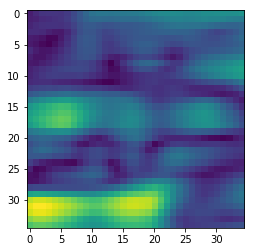

In [12]:
plt.figure()
plt.imshow(result[-1][0,:,:,2])
plt.show()